# Integración numérica en Python

## Integrales múltiples 

Las integrales múltiples pueden determinarse numéricamente, primero integrando en una dimensión, luego en una segunda, y así sucesivamente para todas las dimensiones del problema. 

**Tarea 1:** Use este mecanismo para estimar la integral de $T(x,y)=2xy+2x-x^2-2y^2+72$. Haga un pequeño código con una función que permita calcular esta integral doble y además use `scipy.integrate.dblquad` para calcularla desde librerías ya hechas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from matplotlib import rcParams
from mpl_toolkits.mplot3d.axes3d import Axes3D
import math
from scipy import integrate
%matplotlib notebook

<IPython.core.display.Javascript object>


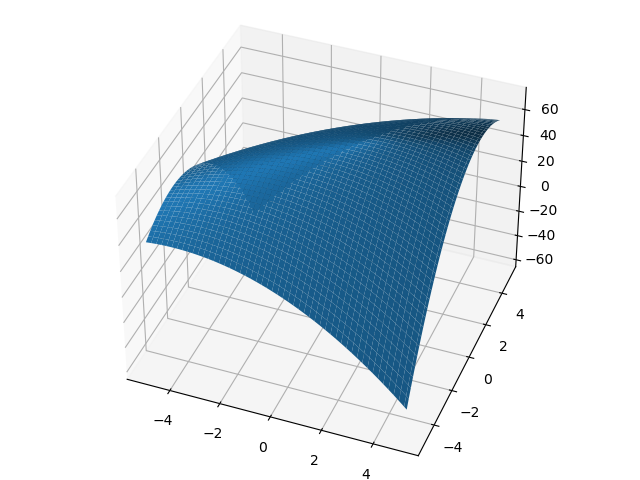

In [2]:
fig = plt.figure()
axes3d = Axes3D(fig)
 
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
 
X,Y = np.meshgrid(x,y)
Z = 2*X*Y + 2*X - X**2 -2*Y**2 + 72


axes3d.plot_surface(X,Y,Z)
plt.show()

Consideremos la integral doble $\displaystyle \int \displaystyle \int_R f(x,y)dA$, donde $R = \{ (x,y)/a \leq x \leq b, c \leq y \leq d \}$.

### Regla del trapecio


Escribiendo la integral como una integral iterada tenemos $\displaystyle \int \displaystyle \int_R f(x,y)dA = \displaystyle \int_a ^b \Bigg[ \displaystyle \int_c ^d f(x,y)dy \Bigg] dx$ 

$\displaystyle \int_c ^d f(x,y)dy \approx \dfrac{k}{2}\big[f(x,c)+f(x,d)\big]$, con $k=d-c$ 


$\displaystyle \int_a ^b \dfrac{k}{2} \big[f(x,c)+f(x,d)\big] \approx \dfrac{h}{2} \dfrac{k}{2} \big[f(a,c)+f(b,c)+f(b,d)+f(d,c)\big]$, con $h=b-a$ 

$\displaystyle \int_a ^b \displaystyle \int_c ^d f(x,y)dy dx \approx \dfrac{hk}{4} \big[f(a,c)+f(b,c)+f(b,d)+f(d,c)\big]$

In [3]:
def Trapecio2D(f, a, b, c, d, n, m):
    ''' 
    Cuadratura del trapecio.
    Parametros:
    f   : funcion a ser integrada
    a, b : limites de integracion en x
    c, d : limites de integracion en y
    n  : numero de celdas a ser dividido el dominio x     
    m  : numero de celdas a ser dividido el dominio y
    '''
    hx = (b - a) / n
    n1 = n + 1
    hy = (d - c) / m
    m1 = m + 1
    x = np.linspace(a,b,n1)
    y = np.linspace(c,d,m1)
    I = 0
    for i in range(1,n1):  
        for j in range(1,m1):
            a1 = x[i-1]
            b1 = x[i]
            c1 = y[j-1]
            d1 = y[j]
            I = I + f(a1,c1) + f(a1,d1) + f(b1,c1) + f(b1,d1)
    I = 0.25 * hx * hy * I     
    return I

### Regla del Simpson

Recordemos la integral: $\displaystyle \int \displaystyle \int_R f(x,y)dA = \displaystyle \int_a ^b \Bigg[ \displaystyle \int_c ^d f(x,y)dy \Bigg] dx$, 

donde $k=\dfrac{d-c}{2}$  y  con $h=\dfrac{b-a}{2}$.

Integrando con respecto a $y$, $\displaystyle \int_c ^d f(x,y)dy \approx \dfrac{k}{3}\big[f(x,c)+4f(x,c+k)+f(x,d)\big]$

Luego con respecto a $x$ $\displaystyle \int_a ^b \dfrac{k}{3}\big[f(x,c)+4f(x,c+k)+f(x,d)\big]$

$\approx \dfrac{kh}{9} \big[f(a,c)+4f(a+h,c)+f(b,c)+4f(a,c+k)+16(a+h,c+k)+4(b, c+k)+f(a,d)+4f(a+h,d)+f(b,d)\big]$

In [4]:
def Simpson2D(f,a,b,c,d,n,m):
    '''Cuadratura de Simpson.
    Parametros:
    f   : funcion a ser integrada
    a, b : limites de integracion
    c, d : limites de integracion en y
    n  : numero de celdas a ser dividido el dominio x     
    m  : numero de celdas a ser dividido el dominio y
    '''
    aux1 = math.fmod(n,2)
    aux2 = math.fmod(m,2)
    hx = (b - a) / n
    n1 = n + 1
    hy = (d - c) / m
    m1 = m + 1
    x = np.linspace(a,b,n1)
    y = np.linspace(c,d,m1)
    I = 0
    if aux1 == 0 and aux2 == 0:
        for i in range(1,n,2):
            for j in range(1,m,2):
                a1 = x[i-1]
                pmx= x[i]
                b1 = x[i+1]
                c1 = y[j-1]
                pmy= y[j]
                d1 = y[j+1]
                I  = I + f(a1,c1) + 4*f(pmx,c1) + f(b1,c1) + 4*f(a1,pmy) + 16*f(pmx,pmy) + 4*f(b1,pmy) + f(a1,d1) + 4*f(pmx,d1) + f(b1,d1)
        I = (1/9) * hx * hy * I     
    else:            
        print('>>> ERROR: El numero de divisiones del intervalo debe ser par ...')
    return I

### Método tradicional
![title](Int.jpeg)

In [5]:
I_exacta = 4700

In [6]:
f = lambda y, x: 2*x*y + 2*x - x**2 - 2*y**2 + 72

In [7]:
I_trapecio = Trapecio2D(f, -5, 5, -5, 5, 100, 100)

In [8]:
print(I_trapecio, np.abs((I_trapecio - I_exacta)) / I_exacta)

4699.500000000006 0.00010638297872204969


In [9]:
I_simpson = Simpson2D(f, -5, 5, -5, 5, 100, 100)

In [10]:
print(I_simpson, np.abs((I_simpson - I_exacta)) / I_exacta)

4699.999999999991 1.9350951101551665e-15


### [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html)

`scipy.integrate.dblquad`

In [11]:
I_scipy = integrate.dblquad(f, -5, 5, lambda x: -5, lambda x: 5)
I_scipy

(4700.000000000001, 5.218048215738237e-11)

In [12]:
print(I_scipy, np.abs((4700.000000000001 - I_exacta)) / I_exacta)

(4700.000000000001, 5.218048215738237e-11) 1.9350951101551664e-16


In [13]:
Metodo = ['Scipy', 'Simpson', 'Trapecio']
Solucion = [4700.000000000001, 4699.999999999991, 4699.500000000006]
Error = [1.9350951101551664e-16, 1.9350951101551665e-15, 0.00010638297872204969]
Exacta = [4700, 4700, 4700]
df = pd.DataFrame()
df['Metodo'] = Metodo
df['Exacta'] = Exacta
df['Solucion'] = Solucion
df['Error'] = Error

In [14]:
df

,Metodo,Exacta,Solucion,Error
0,Scipy,4700,4700.0,1.935095e-16
1,Simpson,4700,4700.0,1.935095e-15
2,Trapecio,4700,4699.5,1.063830e-04
